# Estimación de una cónica utilizando un filtro de Kalman no-lineal.

# Planteamiento del filtro de Kalman no-lineal.

 * El estado del sistema lo denominamos como $\mathbf{x}$.
 * Una observación la denominamos como $\mathbf{z}$.

La función que mapea el estado a una observación es:

$$
\mathbf{z} =\mathbf{H}\mathbf{x}
$$

Este plateamiento asume que la relación entre el estado $\mathbf{x}$ y la medición $\mathbf{z}$ es lineal. Cuando esto no es así, una opción es utilizar el filtro extendido de Kalman.

Asumamos que la relación entre el estado y la medición esta dada por la función $h$:

$$
\begin{aligned}
 \mathbf{h}(\mathbf{x}, \mathbf{z}) & = 0.
\end{aligned}
$$

A esta función la vamos a llamar como función de medición.

Si asumimos que el valor estimado del estado ($\mathbf{\hat{x}}_{k-1}$) y de la medición ($\mathbf{\hat{z}}_k$) son buenas aproximaciónes a sus correspondientes valores reales, podemos expandir la funcion de medición usando una serie de Taylor, truncandola despues de los primeros términos para obtener una aproximación a un sistema lineal.

$$
\begin{aligned}
\mathbf{h}_i(\mathbf{x}, \mathbf{z}_i) = 0 \approx \mathbf{h}_k(\mathbf{\hat{x}}_{k-1}, \mathbf{\hat{z}}_k)+\frac{\partial \mathbf{h}}{\partial \mathbf{z}_k}(\mathbf{z}_k-\hat{\mathbf{z}}_k)+\frac{\partial \mathbf{h}}{\partial \mathbf{x}}(\mathbf{x}-\hat{\mathbf{x}}_{k-1})
\end{aligned}
$$

donde los Jacobianos $\frac{\partial \mathbf{h}{\partial \mathbf{z}_k}$ y $\frac{\partial \mathbf{h}}{\partial \mathbf{x}}$ se evaluan en ($\mathbf{\hat{z}}_k, \mathbf{\hat{x}}_{k-1}$).

Estas ecuaciones pueden reescribirse como sigue:

$$
\begin{aligned}
\mathbf{y}_k & = \mathbf{H}_k\mathbf{x}+ \mathbf{u}_k
\end{aligned}
$$

donde:

$$
  \begin{aligned}
  \mathbf{y}_k & = -\mathbf{h}(\mathbf{\hat{x}}_{k-1}, \mathbf{\hat{z}}_k)+\frac{\partial \mathbf{h}}{\partial \mathbf{x}}\mathbf{x}_{k-1},\\
  \mathbf{H}_k & = \frac{\partial \mathbf{h}}{\partial \mathbf{x}}\\
  &\mathrm{y}\\
  \mathbf{u}_k & = \frac{\partial \mathbf{h}}{\partial \mathbf{z}_k}(\mathbf{z}_k-\mathbf{\hat{z}}_k)
  \end{aligned}
$$

Esta es una ecuación de medición lineal donde $\mathbf{y}_k$ es la medición, el Jacobiano $\frac{\partial \mathbf{h}}{\partial \mathbf{x}}$ es la transformación lineal y $\mathbf{u}$ es el ruido aleatorio de medición.

Tanto $\mathbf{y}_i$ como el Jacobiano se calculan fácilmente a partir de la medicion actual $\hat{\mathbf{z}}_i$, el estado estimado $\mathbf{\hat{x}}_{k-1}$ y la función $h$ y su primera derivada.

La matriz de covarianza $\mathbf{W}_i$ asociada al ruido aleatorio de medición lo podemos calcular como sigue:

$$
\mathbf{R}_k \equiv E[\mathbf{u}_i\mathbf{u}_i^\top] = \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\mathbf{R}\left(\frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)^\top
$$
donde $\mathbf{R}$ es la matriz de covarianza del proceso de medición, *i.e.* $E[(\mathbf{z}-\mathbf{\hat{z}})(\mathbf{z}-\mathbf{\hat{z}})^\top]$.

### Etapa de actualización del filtro de Kalman.

 Las ecuaciones de actualización del filtro de Kalman: quedarían como sigue:

 $$
 \begin{aligned}
  \mathbf{\hat{x}}_k & = \mathbf{\hat{x}}_{k-1} + \mathbf{K}_k(\mathbf{y}_k-\mathbf{H}_k\mathbf{\hat{x}}_{k-1})\\
  & = \mathbf{\hat{x}}_{k-1} - \mathbf{K}_k \mathbf{h}(\mathbf{\hat{x}}_{k-1}, \mathbf{\hat{z}}_k),\\
    \mathbf{P}_k & = (\mathbf{I}-\mathbf{K}_k\mathbf{H}_k\mathbf{P}_{k-1})\\
    &\mathrm{y}\\
    \mathbf{K}_k & = \mathbf{P}_{k-1}\mathbf{H}_k^\top(\mathbf{W}_k+\mathbf{H}_k\mathbf{P}_{k-1}\mathbf{H}_k^\top)^{-1}
  \end{aligned}
 $$




## Ajustar un círculo usando un filtro de Kalman no lineal.

Queremos encontrar los parámetros a partir de mediciónes discretas.

$$
  \begin{aligned}
    (x-\alpha)^2+(y-\beta)^2 & =  \gamma^2
  \end{aligned}
$$

En este caso el estado $\mathbf{x}$ esta definido como sigue:

$$
  \begin{aligned}
    \mathbf{x}=\left[\begin{array}{ccc} \alpha & \beta & \gamma \end{array}\right]^\top
  \end{aligned}
$$

Y las mediciones están definidas como sigue:

$$
  \begin{aligned}
    \mathbf{z}=\left[\begin{array}{cc} x & y \end{array}\right]^\top
  \end{aligned}
$$

La función que relaciona el estado con las mediciones es el siguiente:

$$
  \begin{aligned}
    \mathbf{h}_k(\mathbf{x}_k, \mathbf{z}) & = (x-\alpha)^2+(y-\beta)^2  - \gamma^2  = 0
  \end{aligned}
$$

Y sus derivadas son las siguientes:
$$
 \begin{aligned}
    \frac{\partial \mathbf{h}_k}{\partial \mathbf{z}_k} & = 
    \left[\begin{array}{cc}\frac{\partial \mathbf{h}_k}{\partial x} &
                           \frac{\partial \mathbf{h}_k}{\partial y}
          \end{array}\right]\\
    & =  \left[\begin{array}{cc} 2(x_k-\alpha) & 2(y_k-\beta)\end{array}\right]\\
  \end{aligned}
$$

$$
 \begin{aligned}
    \frac{\partial \mathbf{h}_k}{\partial \mathbf{x}_k} & = 
    \left[\begin{array}{ccc}\frac{\partial \mathbf{h}_k}{\partial \alpha}
     & \frac{\partial \mathbf{h}_k}{\partial \beta}
     & \frac{\partial \mathbf{h}_k}{\partial \gamma}\end{array}\right]\\
    & =  \left[\begin{array}{ccc} 2(\alpha-x_k) & 2(\beta-y_k) & -2\gamma \end{array}\right]\\
  \end{aligned}
$$


In [33]:
import numpy as np
import matplotlib.pyplot as plt
# Enable interactive plot
%matplotlib notebook

# Definimos el numero s muestras aleatorias a añadir a los tres valores
# iniciales propuestos en el reporte de M. Orr.
N=100

# Definimos la matriz de covarianza asociada a la funcion de probabilidad
# que describe los datos que recibimos.
Fact=60
Sigma=Fact * np.array([[0.0001],[0.0004]])*(np.eye(2))

print (Sigma)

# Definimos N puntos aleatorias que yacen en la circunferencia definida
# por alpha, beta y gamma:
#
# (x1-alpha)**2 + (x2-beta)**2 = gamma**2
alpha, beta, gamma = 3, 3, 2

# Evaluamos la función para generar puntos en la circunferencia del círculo.
theta = np.pi*(4*np.random.rand(N)-2)
p = gamma * np.cos(theta) + alpha 
q = gamma * np.sin(theta) + beta

# Creamos un arreglo para almacenar los valores iniciales del sistema
# e inicializamos las tres primeras coordenadas.
x=np.zeros((2,N+4))
x[:, 0]=[0, 0]
x[:, 1]=[1.01, 3.02]
x[:, 2]=[2.98, 1.01]
x[:, 3]=[2.99, 4.97]


# Añadimos un ruido Gaussiano a las coordenadas generadas anteriormente.
N+=4
x[:, 4:N]=np.array([p,q])
x[:, 4:N]+=np.sqrt(Sigma).dot(np.random.randn(2,N-4))


# Creamos la matriz donde almacenaremos los parametros al irlos estimando,
# e inicializamos el primer valor.
a = np.zeros((3,N))
a[:, 0]=[3.5, 2.5, 1.5]

#inicializamos la matriz de covarianza del valor estimado.
S = np.eye(3)
Sold = np.eye(3)

for i in range(1,N):
    # Calculamos las derivadas parciales de la funcion con respecto a $x$ y a $a$.
    dfx = np.array([ 2*(x[0, i]-a[0, i-1]), 2*(x[1, i]-a[1, i-1])],ndmin=2)
    dfa = np.array([ 2*(a[0, i-1]-x[0, i]), 2*(a[1, i-1]-x[1, i]), -2*a[2, i-1] ],ndmin=2)
    M = dfa

    # Calculamos el valor de la ganancia $K$ el nuevo valor de $S$
    # y el nuevo valor estimado $a$.
    W = dfx.dot(Sigma.dot(dfx.T))

    fi = (x[0, i]-a[0, i-1])**2 + (x[1, i]-a[1, i-1,])**2 - a[2,i-1]**2
    y = -fi+dfa.dot(a[:,i-1])
    K=(1./(W+M.dot(Sold.dot(M.T)))) * Sold.dot(M.T)
    S = np.dot((np.eye(3)-np.outer(K,  M)), Sold)
    a[:, i] = a[:,i-1]+K.dot(y-M.dot(a[:,i-1]))

    Sold = np.copy(S)

[[0.006 0.   ]
 [0.    0.024]]


<IPython.core.display.Javascript object>


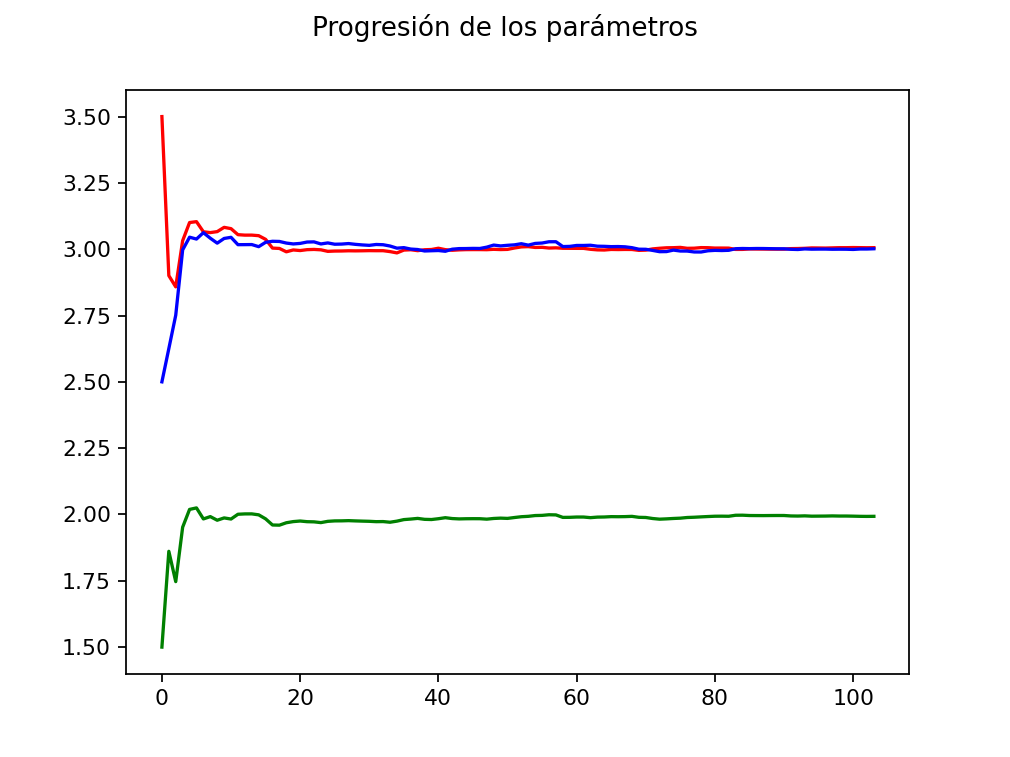

In [34]:
fig1, ax1 = plt.subplots(1,1)
fig1.suptitle("Progresión de los parámetros")
ax1.plot(a[0, :],'r')
ax1.plot(a[1, :],'b')
ax1.plot(a[2, :],'g')

<IPython.core.display.Javascript object>


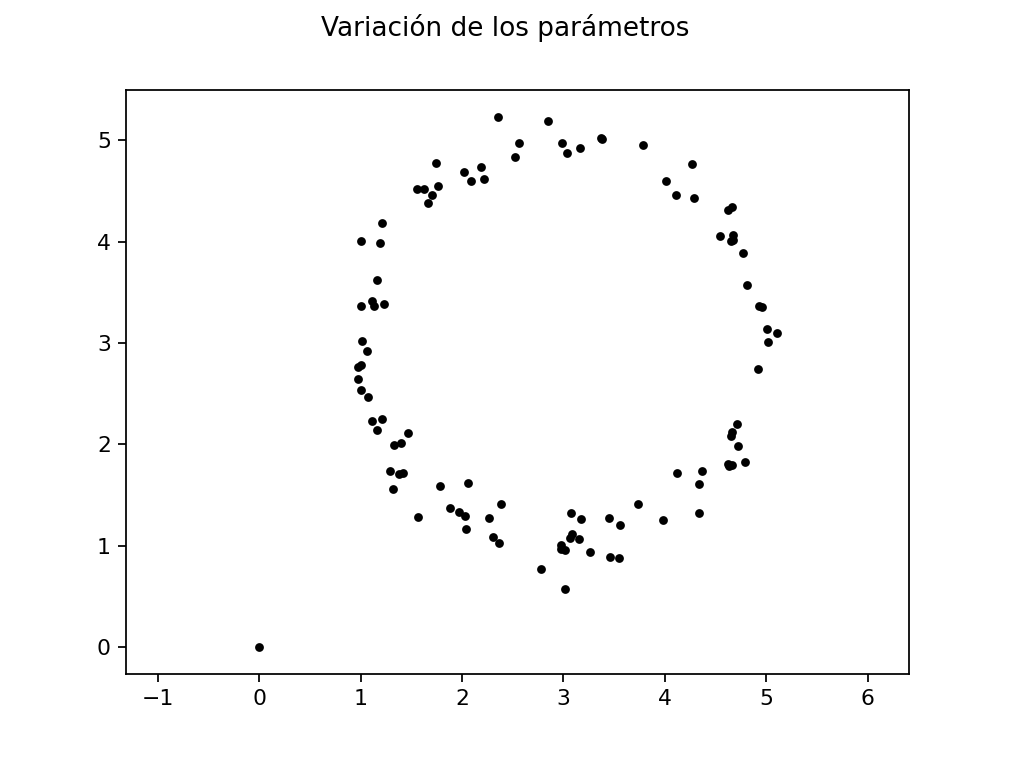

(-0.25513571963728254,
 5.357850112382933,
 -0.26162817785699244,
 5.494191734996841)

In [32]:
fig2, ax2 = plt.subplots(1,1)
fig2.suptitle("Variación de los parámetros")
ax2.plot(x[0, :],x[1,:],'k.')
ax2.axis('equal')
